<a href="https://colab.research.google.com/github/dianakang/K_digital_likelion_week2/blob/master/20201217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 딥러닝 네트워크를 이용한 회귀

In [1]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# Dense = '완전연결법' / 첫번째 레이어 유닛 개수는 사용자가 감으로 설정
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),  # 'tanh' 활성화함수는 하이퍼볼릭 탄젠트 함수로, 실수 입력을 받아 -1과 1 사이의 출력을 반환한다 (cf.시그모이드 함수 = 0~1)
      tf.keras.layers.Dense(units=1)           # X 입력값에 대한 하나의 Y값만 출력해야 하기 때문에 뉴런 수가 1개이다.
])

# SGD = 확률적 경사하강법
# 'mse' = 평균 제곱 오차(Mean Squared Error)로, 잔차의 제곱의 평균이 되기 때문에 손실을 줄이는 쪽으로 학습한다. 
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [2]:
# 첫 번째 레이어에는 6개의 뉴런을 할당했음. 
# 뉴런이 많을수록 딥러닝 네트워크의 예측성능이 좋아지지만, 너무 많으면 학습이 제대로 안 되거나 과적합(overfitting)될 수 있음. 

In [3]:
model.fit(X,Y, epochs=10)    # epochs = 반복학습을 하는 횟수

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 254.6208
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 127.6963
Epoch 3/10
1/1 [==============================] - 0s 997us/step - loss: 14.7037
Epoch 4/10
1/1 [==============================] - 0s 964us/step - loss: 9.8641
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 9.7062
Epoch 6/10
1/1 [==============================] - 0s 829us/step - loss: 9.6963
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6912
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6862
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 9.6808
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6749


In [4]:
# 손실에 거의 변화가 없으면 학습이 거의 다 된 것이다.

# 딥러닝(머신러닝)에서는 충분히 학습했다고 판단하면 학습을 종료해야한다.
# 그렇지 않으면 학습 데이터에 과적합(overfitting)되어 새로운 데이터가 들어왔을 때 유연하게 대처하지 못할 수 있다.
# 학습 데이터의 일부를 검증 데이터(validataion data)라고 하는데, 이를 설정하는 것은 학습을 언제 멈출지 결정하는 좋은 판단 기준이 된다.

In [5]:
# 학습이 끝나면 X를 입력했을 때 딥러닝 네트워크가 어떤 값을 예측하는지 확인해야한다!

In [6]:
model.predict(X)

array([[15.642442],
       [15.926805],
       [15.174116],
       [15.741727],
       [15.257723],
       [15.665956],
       [15.822936],
       [15.876768],
       [15.925585],
       [15.855126],
       [15.934628],
       [15.864109],
       [15.83077 ],
       [15.745068],
       [15.92434 ],
       [14.196185]], dtype=float32)

In [7]:
# 거의 15 부근의 값을 출력하고 있다. 그렇다면 이제 이 결과를 시각화 해 볼 차례!

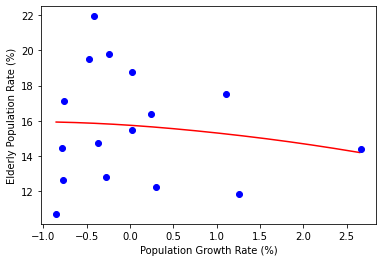

In [8]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)   # 0.01은 간격
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()


In [9]:
# 딥러닝 네트워크도 앞서 배웠던 직선, 2차함수와 비슷한 성능으로 'X 데이터에 대해서 Y를 예측한다'는 결론을 내릴 수 있다.
# 이는 회귀식을 가정하고 변수를 직접 추정('a,b,c,d 정의')하지 않아도 딥러닝 네트워크를 이용해 회귀선을 예측할 수 있다는 것이다.

# 3.4 보스턴 주택 가격 데이터 세트

In [10]:
from tensorflow.keras.datasets import boston_housing
#   훈련 데이터       테스트 데이터
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

57344/57026 [==============================] - 0s 0us/step
404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [11]:
# 훈련 데이터가 404개, 테스트 데이터가 102개 
# 검증 데이터는 훈련 데이터의 일부

In [12]:
# 데이터 세트의 속성을 보면, 각 데이터의 단위가 다르다는 것을 알 수 있다. (ex. 숫자, %, $ 등)
# 따라서 딥러닝에서는 이러한 데이터를 전처리하여 정규화(Standardization)를 해야한다.

## 3.4.1 데이터 전처리(정규화)

In [13]:
# 데이터를 정규화하려면 각 데이터에서 평균값을 뺀 다음 표준편차로 나눈다.
# 평균과 표준편차를 구할 때는 '훈련 데이터'의 평균과 표준편차를 구한 후, 이것으로 테스트 데이터도 정규화한다.

# axis는 데이터의 축을 나타낸다.
# std는 표준편차를 구하는 함수이다.
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)

# train_X - x_mean을 다시 train_X에 넣어준다는 의미이다.
# 밑에 /= 도 마찬가지로 나누기 한 것을 다시 넣어준다는 뜻!
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

# Python은 0부터 시작하므로 리스트에 0을 넣어 첫번째 값을 출력한다.
print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [14]:
# 전처리 결과, 단위가 숫자로 통일되어 나오고 있음을 알 수 있다.

## 3.4.2 데이터셋 회귀 모델 생성

In [15]:
# Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),     # 첫 번째 레이어에서는 X 데이터의 속성을 모두 불러오기 위해 input_shape의 첫 번째 차원을 변수의 개수로 지정한다.
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),                        
    tf.keras.layers.Dense(units=1)          # 마지막 레이어는 주택가격인 Y값 1개만 예측하면 되므로 뉴런의 수가 1개이다.
])                                          # 활성화 함수는 ReLU를 주로 사용했다 -> 입력값: - 이면 출력값: 0
                                            # ReLU 함수는 여러 개의 레이어를 겹쳐서 사용할 때 시그모이드 함수나 tanh보다 좋은 결과를 얻을 수 있다.
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [16]:
# model.fit()함수로 회귀 모델을 학습시킨다.
# validation_split이라는 인수가 추가됐다. 이는 훈련 데이터의 일부인 검증 데이터로 학습 결과를 검증한다.
history = model.fit(train_X,train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 12ms/step - loss: 1.4756 - val_loss: 0.8013
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4457 - val_loss: 0.4309
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2670 - val_loss: 0.3661
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2134 - val_loss: 0.2688
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1642 - val_loss: 0.1902
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1437
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1640 - val_loss: 0.3227
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1975 - val_loss: 0.3684
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1692 - val_loss: 0.2124
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1305 - val_loss: 0.1538
Epoch 11/25
10/10 

In [17]:
# loss는 학습 데이터를 이용해 구한 값이고, val_loss는 검증 데이터를 이용해 구한 값이다.

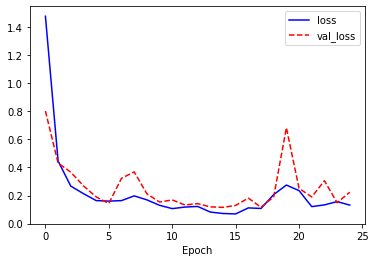

In [18]:
import matplotlib.pyplot as plt
# history에는 loss와 val_loss가 저장되어 있다.
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()       # 범례
plt.show()

In [19]:
# 파란색 실선인 훈련 데이터의 손실은 비교적 꾸준히 감소하는데 비해, 붉은색 점선으로 표시된 검증 데이터의 손실은 항상 감조하지만은 않는다.
# 특히 마지막 에포크에 검증 데이터의 손실이 크게 증가했기 때문에 네트워크는 검증 데이터에 대해 좋지 않은 성적을 낼 것이다.

In [20]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)   # 테스트 데이터 -> 꼭 마지막 단계에서만 써야 함.

4/4 [==============================] - 0s 1ms/step - loss: 0.2128


0.2128281146287918

In [21]:
# 실제 주택 가격과 예측 주택 가격을 1:1로 비교

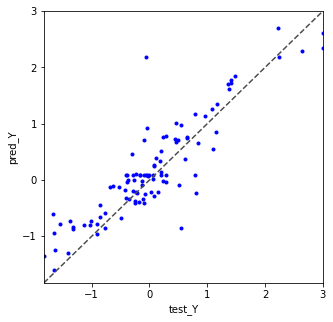

In [22]:
import matplotlib.pyplot as plt
pred_Y = model.predict(test_X)
plt.figure(figsize=(5,5))      # figure = '그림을 얼마나 크게 그릴 것인지'
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])  # axis = 축

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")       # c = 점의 크기
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [23]:
# 약간의 이상치가 발생하고 있음을 확인할 수 있다.
# 검증 데이터와 테스트 데이터 모두 좋은 예측 성적을 내려면 어떻게 해야할까?
# 검증 데이터와 테스트 데이터는 훈련 데이터와 달리 네트워크의 가중치에 영향을 미치지 않는다는 공통점이 있다.
# 즉, 검증 데이터에 대한 성적이 좋아지면, 테스트 데이터에 대한 성적도 좋아지게 된다.
# 검증 데이터에 대한 성적이 좋아지려면 네트워크가 훈련 데이터에 과적합되지 않도록 학습 도중 끼어들어 학습을 멈춰줘야 한다.  -> 이를 '콜백(callback)'이라 한다.

In [24]:
# 콜백 함수는 에폭이 끝날 때마다 호출된다.
# model.fit()함수에 callbacks 인수를 사용해 콜백 함수의 리스트를 지정할 수 있다. 

In [25]:
# 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),        # units의 수는 점차 줄어드는 모습으로 써주는게 일반적.
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,

# patience는 몇 번의 에폭을 기준을 삼을 것인지에 대한 인수이며 보통 5 ~ 10을 넣어준다. / monitor는 어떤 값을 지켜볼 것인지에 대한 인수이다 / 'val_loss'는 검증 데이터이다. 
# 콜백 함수의 리스트에 들어간 함수는 tf.keras.callbacks.EarlyStopping이다.
# 과적합을 막기 위해 학습을 일찍 멈추는 기능을 하는 함수이다. 
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 22ms/step - loss: 2.1352 - val_loss: 1.0795
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5290 - val_loss: 0.7109
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4507 - val_loss: 0.7155
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4183 - val_loss: 0.6843
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2664 - val_loss: 0.2406
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1666 - val_loss: 0.7050
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2782 - val_loss: 0.2585
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2319 - val_loss: 0.3961


In [26]:
# 여기서는 val_loss가 3회의 에폭을 수행하는 동안 최고 기록을 갱신하지 못한다면 학습을 멈추게 된다.
# 25번째까지 가지 못하고 조기중단 되었다. 

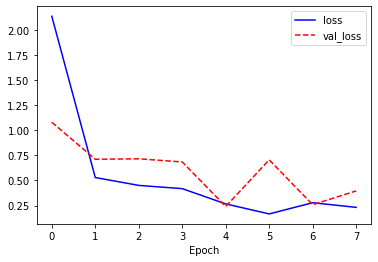

In [27]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [28]:
# 조기 학습 중단이 작용한 것을 확인할 수 있다.
# 이전과는 달리 검증 데이터의 손실에서 뚜렷한 증가세가 보이지 않는다.

In [29]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.2017


0.20170879364013672

In [30]:
# 이전의 수치에 비해 상대적으로 낮은 수치가 나온다는 것을 알 수 있다.
# 네트워크의 목적은 '손실을 감소시키는 것'이기 때문에 조기 중단을 수행한 이 모델의 학습이 더 잘 됐다고 할 수 있다.

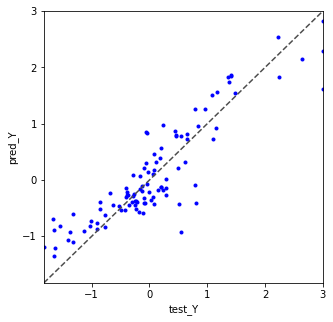

In [34]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls ="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [35]:
# 이전 결과에 비해 좀 더 정교하게 값을 예측하는 것으로 보인다.
# 이렇게 콜백 함수로 EarlyStopping을 이용하면 네트워크가 과적합되지 않도록 도중에 학습을 멈출 수 있다.